<a href="https://colab.research.google.com/github/CarlosLopes88/03_Time_series/blob/main/Sarima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# origem: https://www.kaggle.com/tevecsystems/retail-sales-forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/CarlosLopes88/projeto_prev_vendas/main/mock_kaggle.csv', delimiter=',',decimal='.')

df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [ ]:
# conversão do campo data e indexando

df['data'] = pd.to_datetime(df['data'])

df = df.loc[df['data'].between('2016-01-01', '2016-07-31')]

df = df.set_index('data')

df = df.drop(columns=['estoque','preco'],axis=1)

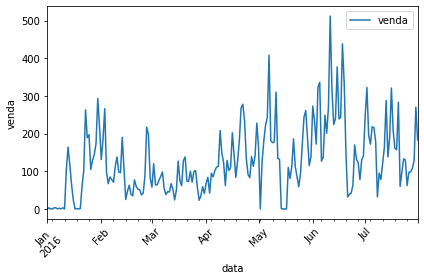

In [ ]:
df.plot()
plt.xticks(rotation=45)
plt.xlabel('data')
plt.ylabel('venda')
plt.tight_layout()

In [ ]:
# Separando os dados em teste e treino

t_treino = df[df.index<'2016-07-01'].index.values
t_teste = df[df.index>='2016-07-01'].index.values
X_treino = df[df.index<'2016-07-01'].values
X_teste = df[df.index>='2016-07-01'].values

In [ ]:
# Importando e aplicando o modelo SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Aplicando o modelo

modelo_sarimax = SARIMAX(X_treino, order=(10,1,1), seasonal_order=(0,1,1,20))
resultado = modelo_sarimax.fit()

print('Coefficients: %s' % resultado.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Coefficients: [-9.50923156e-01 -4.38657571e-01 -5.39171624e-01 -2.72527472e-01
 -3.92633922e-01 -3.51053186e-01  1.25113931e-01  7.24528563e-02
 -8.23891221e-02  3.66571098e-02  7.94911607e-01 -9.78337224e-01
  3.62247354e+03]


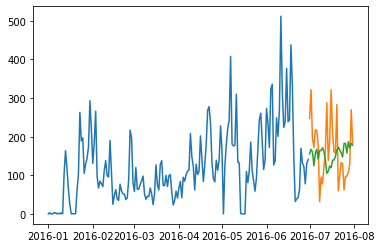

In [ ]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

plt.plot(t_treino,X_treino)
plt.plot(t_teste,X_teste)
plt.plot(t_teste,X_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(X_teste,X_pred)

RMSE = np.sqrt(MSE)

print("RMSE = {:0.2f}".format(RMSE))

RMSE = 86.93


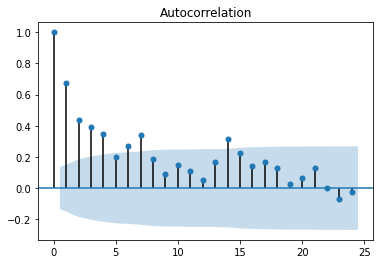

In [ ]:
# Testes adf e pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)
plt.show()


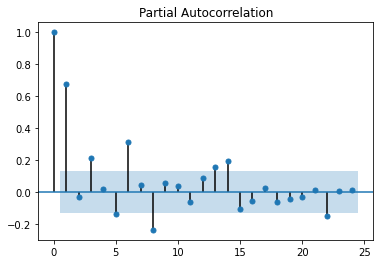

In [ ]:
plot_pacf(df)
plt.show()